<a href="https://colab.research.google.com/github/e19166/e19-4yp-Dynamic-Multi-Dimensional-Resource-Orchestration-in-Kubernetes/blob/main/results/randpw_memory_limit_reduction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd

df = pd.read_csv('randpw_memory_limit_reduction.csv')
df.head()  # to preview the data

,Timestamp,Service,CPU Request,Memory Request,CPU Limit,Memory Limit,Latency,CPU Usage,Memory Usage,CPU Throttling,Memory Working Set
0,2025-05-11T20:31:27.299000,rand-pw-gen-deployment,0.1,134217728,0.2,268435456,0.004366,0.001138,147353600,40.16392,147066880
1,2025-05-11T20:31:57.433000,rand-pw-gen-deployment,0.1,134217728,0.2,268435456,0.004361,0.001124,147353600,40.16392,147066880
2,2025-05-11T20:32:27.518000,rand-pw-gen-deployment,0.1,134217728,0.2,268435456,0.004361,0.001114,147353600,40.16392,147066880
3,2025-05-11T20:32:57.605000,rand-pw-gen-deployment,0.1,134217728,0.2,268435456,0.004366,0.003638,147353600,40.16392,147066880
4,2025-05-11T20:33:27.688000,rand-pw-gen-deployment,0.1,134217728,0.2,268435456,0.004366,0.004299,147353600,40.16392,147066880


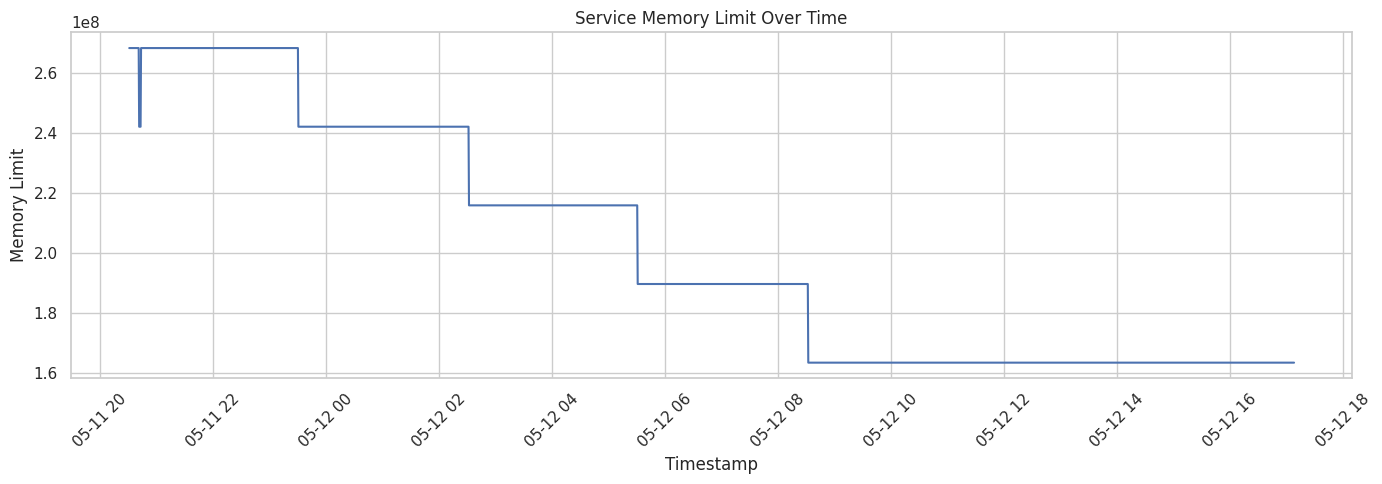

In [3]:
import matplotlib.pyplot as plt
import seaborn as sns

# Convert Timestamp to datetime
df['Timestamp'] = pd.to_datetime(df['Timestamp'], format='mixed')


# Set visual style
sns.set(style="whitegrid")

# Plotting functions
def plot_time_series(x, y, ylabel, title):
  plt.figure(figsize=(14, 5))
  sns.lineplot(x=x, y=y)
  plt.ylabel(ylabel)
  plt.xlabel("Timestamp")
  plt.title(title)
  plt.xticks(rotation=45)
  plt.tight_layout()
  plt.show()

# 1. Latency over time
plot_time_series(df['Timestamp'], df['Memory Limit'], 'Memory Limit', 'Service Memory Limit Over Time')